In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
df=pd.read_csv("E:/21Cam/data/!Lung Cancer.csv/complete_dataframe.csv")
df=df.dropna(subset=['Histologic grade'],axis=0)

F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (22309) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df.head()

Unnamed: 0  1007_s_at   1053_at    117_at    121_at  1255_g_at  \
0  NCI_U133A_93L  10.937022  6.105887  6.657732  8.543040   4.088473   
1  NCI_U133A_70L   9.667748  6.203607  7.444259  8.800833   4.460766   
2  NCI_U133A_87L  10.083438  6.416165  7.145344  8.625512   4.135750   
3  NCI_U133A_64L  10.394160  6.307711  7.290440  8.761087   4.112526   
4  NCI_U133A_99L  10.890421  6.307370  6.835464  8.524622   4.200539   

    1294_at   1316_at   1320_at  1405_i_at  ...  \
0  8.208775  5.248811  5.053609   7.042420  ...   
1  7.960886  5.133321  4.940906   7.618997  ...   
2  8.499000  5.134877  4.836854   7.089821  ...   
3  8.463786  5.476750  4.998902   7.725870  ...   
4  7.584603  5.352621  4.941038   5.878343  ...   

                      SURGICAL_MARGINS              PATHOLOGIC_N_STAGE  \
0  ALL MARGINS PATHOLOGICALLY NEGATIVE  N0, ACCORDING TO AJCC CRITERIA   
1  ALL MARGINS PATHOLOGICALLY NEGATIVE  N1, ACCORDING TO AJCC CRITERIA   
2  ALL MARGINS PATHOLOGICALLY NEGATIVE  N0, ACCORDING TO AJCC CRITERIA   
3  ALL MARGINS PATHOLOGICALLY NEGATIVE  N0, ACCORDING TO AJCC CRITERIA   
4  ALL MARGINS PATHOLOGICALLY NEGATIVE  N0, ACCORDING TO AJCC CRITERIA   

               PATHOLOGIC_T_STAGE  MEDIAN_INTENSITY_UNNORMALIZED  \
0  T2, ACCORDING TO AJCC CRITERIA                          193.0   
1  T2, ACCORDING TO AJCC CRITERIA                          192.0   
2  T1, ACCORDING TO AJCC CRITERIA                          192.0   
3  T2, ACCORDING TO AJCC CRITERIA                          192.0   
4  T2, ACCORDING TO AJCC CRITERIA                          193.0   

   PCT_ARRAY_OUTLIER  PCT_SINGLE_OUTLIER  WARNING  LABORATORY_BATCH  \
0              2.643               0.148      NaN               NaN   
1              1.450               0.184      NaN               NaN   
2              1.634               0.142      NaN               NaN   
3              2.850               0.350      NaN               NaN   
4              3.666               0.244      NaN               NaN   

           Histologic grade  High_risk  
0  Moderate Differentiation        1.0  
1     POORLY DIFFERENTIATED        0.0  
2       WELL DIFFERENTIATED        0.0  
3     POORLY DIFFERENTIATED        0.0  
4     POORLY DIFFERENTIATED        0.0  

[5 rows x 22313 columns]

In [3]:
df.columns

Index(['Unnamed: 0', '1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at',
       '1294_at', '1316_at', '1320_at', '1405_i_at',
       ...
       'SURGICAL_MARGINS', 'PATHOLOGIC_N_STAGE', 'PATHOLOGIC_T_STAGE',
       'MEDIAN_INTENSITY_UNNORMALIZED', 'PCT_ARRAY_OUTLIER',
       'PCT_SINGLE_OUTLIER', 'WARNING', 'LABORATORY_BATCH', 'Histologic grade',
       'High_risk'],
      dtype='object', length=22313)

In [3]:
df1=df[list(df)[-29:]].head()

In [23]:
list(df1)

['target',
 'BlindedIDs',
 'PATIENT_ID',
 'Stratagene',
 'DC_STUDY_ID',
 'SITE',
 'TESTTYPE',
 'IN_DC_STUDY',
 'GENDER',
 'AGE_AT_DIAGNOSIS',
 'RACE',
 'ADJUVANT_CHEMO',
 'ADJUVANT_RT',
 'VITAL_STATUS',
 'FIRST_PROGRESSION_OR_RELAPSE',
 'MONTHS_TO_FIRST_PROGRESSION',
 'MTHS_TO_LAST_CLINICAL_ASSESSMENT',
 'MONTHS_TO_LAST_CONTACT_OR_DEATH',
 'SMOKING_HISTORY',
 'SURGICAL_MARGINS',
 'PATHOLOGIC_N_STAGE',
 'PATHOLOGIC_T_STAGE',
 'MEDIAN_INTENSITY_UNNORMALIZED',
 'PCT_ARRAY_OUTLIER',
 'PCT_SINGLE_OUTLIER',
 'WARNING',
 'LABORATORY_BATCH',
 'Histologic grade',
 'High_risk']

Histologic grade
0  Moderate Differentiation
1     POORLY DIFFERENTIATED
2       WELL DIFFERENTIATED
3     POORLY DIFFERENTIATED
4     POORLY DIFFERENTIATED

In [5]:
22313-30

22283

In [83]:
150*150

22500

In [11]:
22500-22283

217

In [4]:
df2=df[list(df)[1:22284]]

In [6]:
df2.head()

1007_s_at   1053_at    117_at    121_at  1255_g_at   1294_at   1316_at  \
0  10.937022  6.105887  6.657732  8.543040   4.088473  8.208775  5.248811   
1   9.667748  6.203607  7.444259  8.800833   4.460766  7.960886  5.133321   
2  10.083438  6.416165  7.145344  8.625512   4.135750  8.499000  5.134877   
3  10.394160  6.307711  7.290440  8.761087   4.112526  8.463786  5.476750   
4  10.890421  6.307370  6.835464  8.524622   4.200539  7.584603  5.352621   

    1320_at  1405_i_at   1431_at  ...  AFFX-r2-Ec-bioD-3_at  \
0  5.053609   7.042420  4.113564  ...             10.955639   
1  4.940906   7.618997  4.114407  ...             10.804367   
2  4.836854   7.089821  4.171350  ...             11.439064   
3  4.998902   7.725870  4.183584  ...             11.869100   
4  4.941038   5.878343  4.005468  ...             11.664373   

   AFFX-r2-Ec-bioD-5_at  AFFX-r2-Hs18SrRNA-3_s_at  AFFX-r2-Hs18SrRNA-5_at  \
0             10.838858                 12.167027               12.078646   
1             10.770857                 12.570725               12.559008   
2             11.387668                 11.599549               12.247741   
3             11.945222                 10.876703               12.427559   
4             11.620834                 11.499671               13.034142   

   AFFX-r2-Hs18SrRNA-M_x_at  AFFX-r2-Hs28SrRNA-3_at  AFFX-r2-Hs28SrRNA-5_at  \
0                 10.564733               10.695855                8.883689   
1                 11.519766               11.523415               10.265113   
2                 10.996954               11.468901               11.121540   
3                  9.325670               11.358658               10.787231   
4                 10.141856               11.932377               12.132036   

   AFFX-r2-Hs28SrRNA-M_at  AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5_at  
0                7.535913            13.252413            13.260260  
1                8.269276            12.967112            13.071667  
2                8.666058            13.447643            13.458250  
3                7.566944            13.727189            13.750138  
4                8.022812            13.431041            13.485448  

[5 rows x 22283 columns]

In [5]:
s1=df2.var()

In [6]:
s2 = s1.sort_values(axis = 0, ascending=False)

In [10]:
s2

AFFX-HUMRGE/M10098_5_at     8.182353
AFFX-r2-Hs18SrRNA-5_at      7.327058
219612_s_at                 7.279210
206239_s_at                 6.578231
AFFX-r2-Hs18SrRNA-M_x_at    6.005489
                              ...   
220656_at                   0.002506
205837_s_at                 0.002475
211213_at                   0.002448
215112_x_at                 0.002277
215514_at                   0.002223
Length: 22283, dtype: float64

In [7]:
ix=list(s2.index) 

In [8]:
c=ix[0:784]

In [15]:
len(c)

784

In [16]:
c

['AFFX-HUMRGE/M10098_5_at',
 'AFFX-r2-Hs18SrRNA-5_at',
 '219612_s_at',
 '206239_s_at',
 'AFFX-r2-Hs18SrRNA-M_x_at',
 'AFFX-r2-Hs18SrRNA-3_s_at',
 '206561_s_at',
 '205725_at',
 '204351_at',
 '204885_s_at',
 '221728_x_at',
 '214387_x_at',
 '211735_x_at',
 '205982_x_at',
 '209278_s_at',
 '38691_s_at',
 'AFFX-r2-P1-cre-3_at',
 '201909_at',
 '213674_x_at',
 'AFFX-r2-P1-cre-5_at',
 'AFFX-HUMRGE/M10098_M_at',
 '209160_at',
 '207430_s_at',
 '210728_s_at',
 'AFFX-HUMRGE/M10098_3_at',
 '220542_s_at',
 '203824_at',
 '205261_at',
 '204475_at',
 '209942_x_at',
 '218002_s_at',
 '204988_at',
 '213831_at',
 '218835_at',
 '201884_at',
 '214218_s_at',
 'AFFX-r2-Hs28SrRNA-3_at',
 '211653_x_at',
 '205009_at',
 'AFFX-CreX-5_at',
 '209988_s_at',
 '210096_at',
 '213432_at',
 '217564_s_at',
 '209699_x_at',
 '214612_x_at',
 'AFFX-M27830_5_at',
 '204151_x_at',
 '210297_s_at',
 '217561_at',
 '210727_at',
 '204748_at',
 '209309_at',
 '217626_at',
 '216238_s_at',
 '220057_at',
 '204712_at',
 'AFFX-CreX-3_at',
 '20

In [9]:
df2=df2[c]

In [ ]:
df2.corr()

In [19]:
df2.loc[1]

1007_s_at                  9.667748
1053_at                    6.203607
117_at                     7.444259
121_at                     8.800833
1255_g_at                  4.460766
                            ...    
AFFX-r2-Hs28SrRNA-3_at    11.523415
AFFX-r2-Hs28SrRNA-5_at    10.265113
AFFX-r2-Hs28SrRNA-M_at     8.269276
AFFX-r2-P1-cre-3_at       12.967112
AFFX-r2-P1-cre-5_at       13.071667
Name: 1, Length: 22283, dtype: float64

In [20]:

df3 = pd.DataFrame(df['Histologic grade'], columns=['Histologic grade'])

In [17]:
df.loc[df['Histologic grade'] == 'POORLY DIFFERENTIATED'] = 0
df.loc[df['Histologic grade']== 'Moderate Differentiation'] = 1

df.loc[df['Histologic grade'] == 'WELL DIFFERENTIATED'] = 2

In [24]:
df3

Histologic grade
0                  1
1                  0
2                  2
3                  0
4                  0
..               ...
437                0
438                1
439                0
440                1
441                1

[435 rows x 1 columns]

In [23]:
df2

AFFX-HUMRGE/M10098_5_at  AFFX-r2-Hs18SrRNA-5_at  219612_s_at  \
0                  12.302044               12.078646     7.761875   
1                  12.638550               12.559008    11.525180   
2                  12.250528               12.247741     6.341132   
3                  12.316136               12.427559     6.125175   
4                  12.948088               13.034142     5.432662   
..                       ...                     ...          ...   
437                 4.651189                4.870818     8.361751   
438                 4.275861                4.526199     8.941985   
439                10.169439               10.465696    10.818673   
440                 5.039432                5.613878     5.010186   
441                 4.967069                5.342871     7.915378   

     206239_s_at  AFFX-r2-Hs18SrRNA-M_x_at  AFFX-r2-Hs18SrRNA-3_s_at  \
0      13.216499                 10.564733                 12.167027   
1       7.951361                 11.519766                 12.570725   
2      11.142076                 10.996954                 11.599549   
3      11.404586                  9.325670                 10.876703   
4       6.392500                 10.141856                 11.499671   
..           ...                       ...                       ...   
437     6.039054                  4.809485                  5.660154   
438    13.149134                  4.699934                  5.273903   
439    12.624729                 10.944895                 11.586113   
440     5.886733                  5.363481                  6.096032   
441     5.675186                  5.410083                  6.163137   

     206561_s_at  205725_at  204351_at  204885_s_at  ...  203799_at  \
0       8.784218  10.489530  13.234019     7.282408  ...   8.223741   
1       5.120529   6.036610  10.693678     5.511727  ...   6.790906   
2       4.708711  12.677506   7.107831     9.406015  ...   9.743079   
3       5.206139  12.815111   6.697958     7.428719  ...   7.361546   
4       5.440557   6.168545  10.671499     4.587169  ...   7.080515   
..           ...        ...        ...          ...  ...        ...   
437     5.382976   9.773606   8.472353     5.326153  ...   4.899308   
438     4.735966   6.108211  11.097305     8.738693  ...   8.854423   
439     5.456164   6.576913   7.382621     4.790137  ...   8.028544   
440     5.605207   8.078828  10.240850    10.754192  ...   8.582143   
441     5.796111   6.075166  11.998134     4.694199  ...   8.037879   

     210004_at  210095_s_at  202503_s_at  212587_s_at  218952_at  209386_at  \
0     4.934805    11.312071     6.937269     7.965384   6.536961  12.954324   
1     5.297032     9.982504     8.763418     8.474534   7.689998   9.427267   
2     6.856425    10.387865     7.048081     9.919079   7.307119  11.188054   
3     5.006861    10.919368     7.980650     9.748112   8.909941  10.650584   
4     4.963540    10.283620     9.177285     7.856228   6.670861  11.067822   
..         ...          ...          ...          ...        ...        ...   
437   6.299613     9.955977    10.320643     6.661881   8.618856  10.131625   
438   4.584767    10.275101    11.062380     7.961227   6.092787  11.290750   
439   5.322718    10.626032     7.524833     8.738149   6.836526   9.777976   
440   6.730867    11.546668     8.041551     9.834419   6.454094  11.883596   
441   6.169382    10.834756     9.630717     8.265571   6.396676  11.659277   

     212281_s_at  212190_at  209596_at  
0       6.023552   9.035861  10.108536  
1       8.021840   7.474329  10.847785  
2       8.434383   7.877103   8.207844  
3       7.050718   8.099082   9.158668  
4       5.792159  10.762512   9.907637  
..           ...        ...        ...  
437     9.164931   6.756467   7.330250  
438     8.605712   7.392890   7.061705  
439     7.204813   8.799558   9.382543  
440     7.902064   7.504260   8.556113  
441     8.198771   9.481262  10.467844  

[435 rows x 784 

In [28]:
df4=pd.concat([df2,df3],  axis=1)  


In [30]:
df4.to_csv("E:/21Cam/data/lungcancer_image/lungcancerdata.csv")

In [23]:
a_trans=a_trans*255


In [22]:
X=np.array(df2)
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
a_trans = quantile_transformer.fit_transform(X)

F:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (435). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


In [42]:
plt.figure(figsize=(7, 7),dpi=4)


dic={'POORLY DIFFERENTIATED':'0','Moderate Differentiation':'1','WELL DIFFERENTIATED':'2'}
for i in range(len(X)):
        label=y[i]
        arr=np.pad(a_trans[i,:],(0,0), 'constant')
        arr.resize(28,28)
        l=[str(i),dic[label]]

        if label == 'WELL DIFFERENTIATED':
                
                sns_plot2 = sns.heatmap(arr,cmap='rainbow', xticklabels=False, yticklabels=False,cbar=False)
                plt.savefig(r'E:/21Cam/data/lungcancer_image/gray/%s.jpg'%str(i), dpi=300)
                plt.savefig(r'E:/21Cam/data/lungcancer_image/gray/%s.jpg'%str(i+434), dpi=300)
                plt.savefig(r'E:/21Cam/data/lungcancer_image/gray/%s.jpg'%str(2*i+868), dpi=300)
                plt.clf()
        else:
                sns_plot2 = sns.heatmap(arr,cmap='rainbow', xticklabels=False, yticklabels=False,cbar=False)
                plt.savefig(r'E:/21Cam/data/lungcancer_image/color/%s.jpg'%str(i), dpi=300)
                plt.clf()


<Figure size 28x28 with 0 Axes>

array([232.67281106, 229.14746544, 220.33410138, 109.28571429,
       219.74654378, 234.43548387,  82.84562212,  67.56912442,
       142.18894009,  88.13364055, 156.87788018,  47.00460829,
        58.75576037,  59.34331797, 178.61751152,  49.35483871,
       124.56221198,  64.63133641, 231.49769585, 170.39170507,
       222.09677419,  21.73963134, 183.31797235, 231.49769585,
       237.37327189, 254.4124424 , 180.38018433,  70.50691244,
       158.640553  , 145.12672811, 151.00230415, 237.37327189,
        61.10599078, 124.56221198, 252.64976959, 163.92857143,
       225.03456221,  77.55760369, 235.02304147, 134.55069124,
       231.49769585,  78.73271889, 240.31105991, 207.4078341 ,
       113.39861751, 119.27419355, 189.19354839, 108.69815668,
       186.25576037, 233.84792627, 231.49769585, 240.31105991,
       188.01843318, 156.87788018, 226.20967742,  29.37788018,
        44.06682028, 151.58986175, 209.75806452,  85.78341014,
        18.80184332, 101.05990783, 190.9562212 , 221.50

In [6]:
import cv2  # 利用opencv读取图像
import numpy as np
# 利用matplotlib显示图像


image = cv2.imread("E:/21Cam/data/lungcancer_image/color/test/295.jpg") #读取图像

imgray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #彩色转灰度

cv2.imshow("imgray", imgray)



error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [38]:

    
r,g,b = [img[:,:,i] for i in range(3)]
img_gray = r*0.299+g*0.587+b*0.114
    
plt.imshow(img_gray,cmap="gray")
plt.axis('off')
plt.show()

In [37]:
o=np.pad(a_trans[1,:],(0,0), 'constant').resize(28,28)

In [12]:
x = np.array([1.0, 2.0, 1.0, 2.0, 7.0, 9.0, 1.0, 1.0, 3.0, 4.0, 10.0])
N = 4
np.pad(x, (0, N), 'constant')

array([ 1.,  2.,  1.,  2.,  7.,  9.,  1.,  1.,  3.,  4., 10.,  0.,  0.,
        0.,  0.])

In [9]:
x=a_trans[0,:]
x=np.pad(x, (0, 217), 'constant')
x.resize(150,150)

In [5]:
import tensorflow

ModuleNotFoundError: No module named 'tensorflow'

In [12]:
a_trans[0,:]

array([0.93424036, 0.00907029, 0.01133787, ..., 0.70748299, 0.83560091,
       0.86394558])

# 每行array都是一组数据，填充成150*150=22500的列表，转换为array，做heatmap

In [28]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

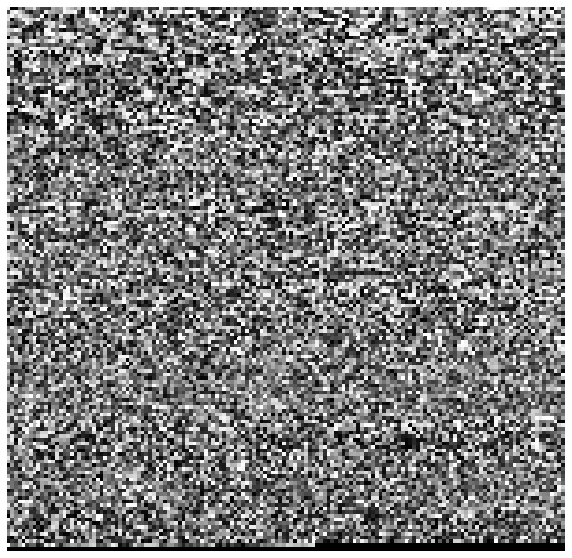

<Figure size 432x288 with 0 Axes>

In [33]:
# cmap='RdBu_r'
plt.figure(figsize=(10, 10))
sns_plot = sns.heatmap(x,cmap='gray', xticklabels=False, yticklabels=False,cbar=False)
# tick_params 中 direction='in'表示刻度线位于内侧，另外还有参数 out,inout


plt.savefig(r'E:/21Cam/supervision/12345svm.png', dpi=300)
plt.show()


plt.clf()

In [32]:
import csv
with  open('E:/21Cam/HW/test.csv','w',encoding="UTF8",newline='') as csvFile:
    writer = csv.writer(csvFile)
    for i in range(10):
        
        #写入多行用writerows
        writer.writerows(str(i))

In [35]:
with open('E:/21Cam/HW/test1.csv','w',newline='',encoding = 'utf-8') as f:
    l1 = [0,1,2]
    l2 = [1,2,3]
    l3 = [2,3,4]
    writer = csv.writer(f)
    writer.writerows((l1,l2,l3))


In [41]:
df5=pd.DataFrame()

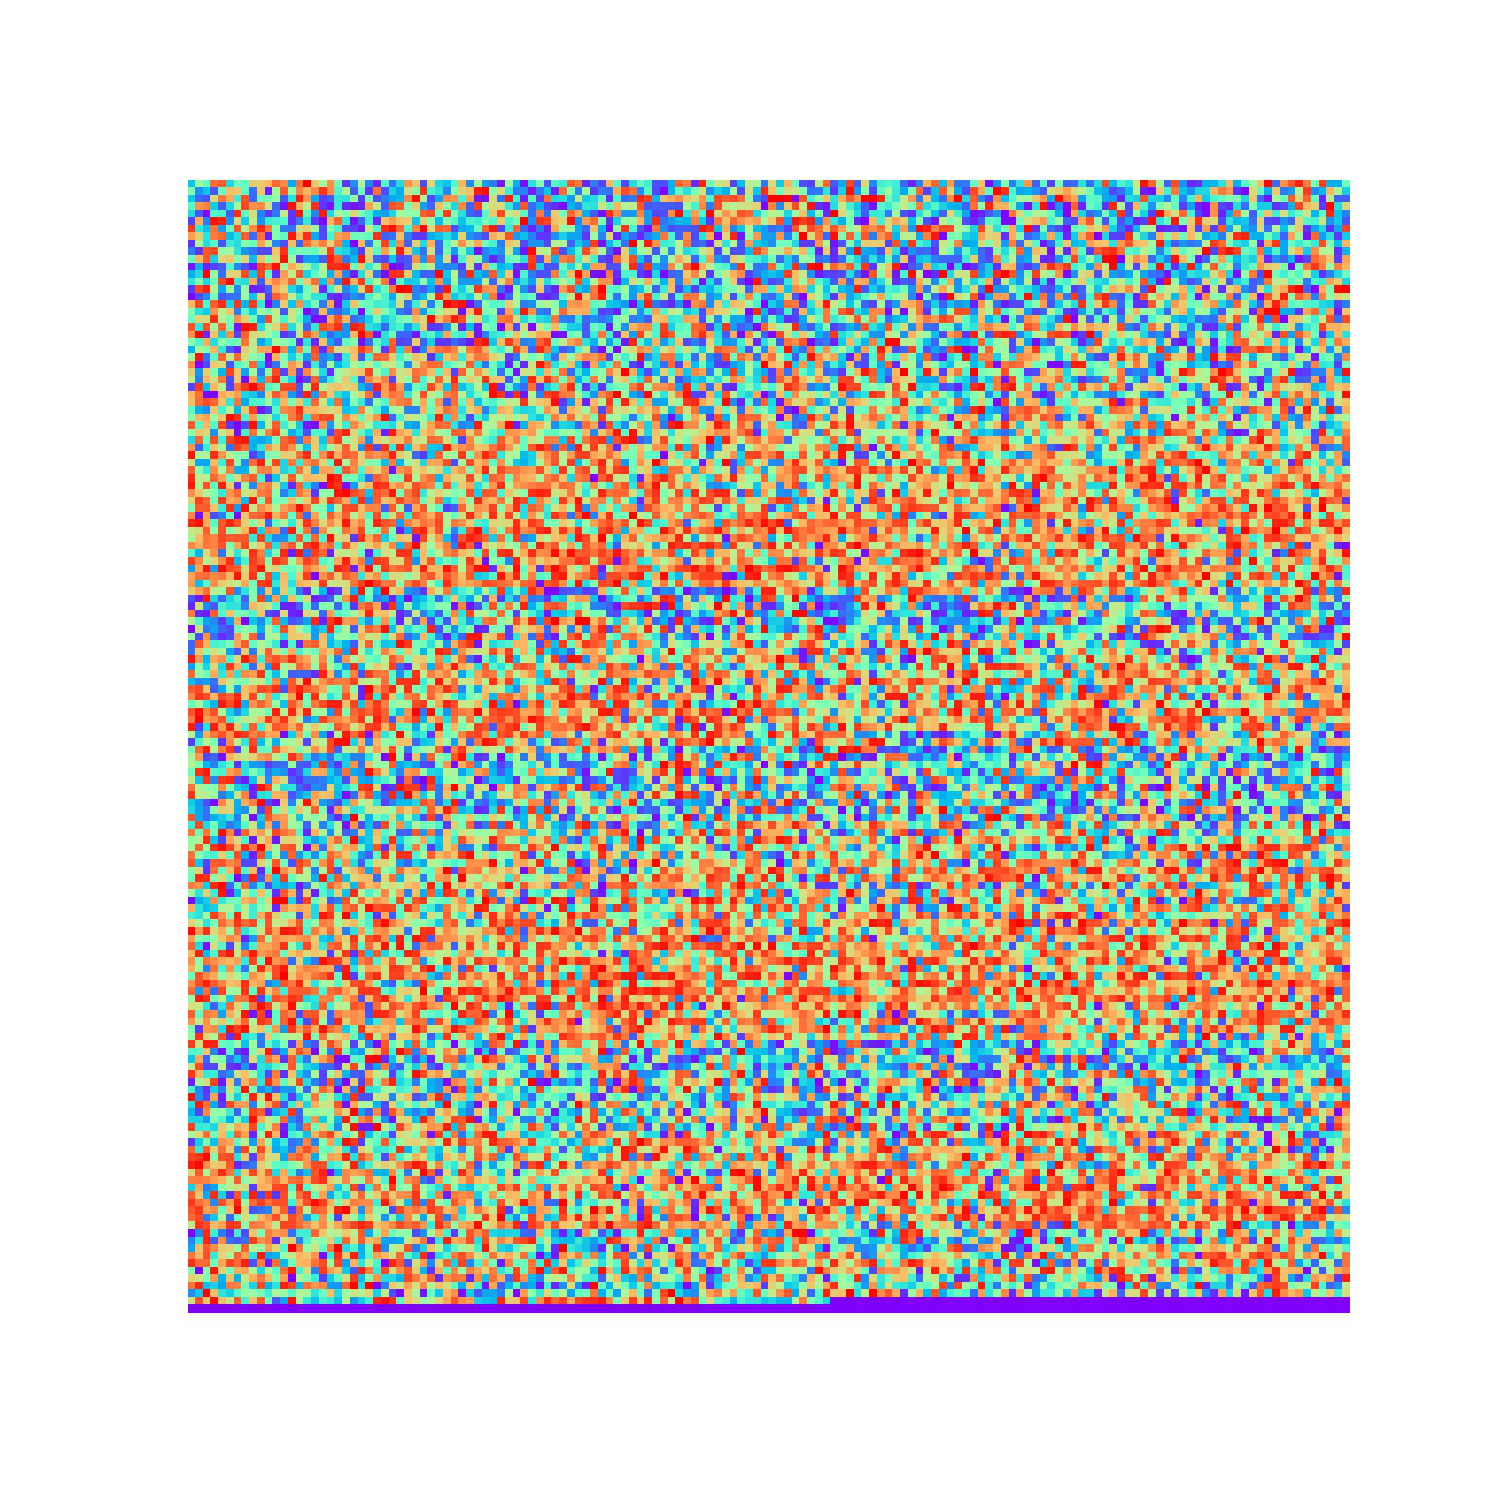

In [14]:
from PIL import Image
img=Image.open('E:/21Cam/data/lungcancer_image/color/100.jpg')
img

In [43]:
import os
import pandas as pd
from torchvision.io import read_image
import os
import pandas as pd
from torchvision.io import read_image
from PIL import Image

In [44]:
for i in range(555):
    
    img=Image.open('E:/21Cam/data/lungcancer_image/gray/%s.jpg'%str(i)).resize((28,28))
    img.save('E:/21Cam/data/lungcancer_image/ajust_image/gray/%s.jpg'%str(i))

In [3]:
class CustomImageDataset:
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

In [71]:
import numpy as np
def __len__(self):
    return len(self.img_labels)
def index(self):
    self.idx=[]
    for i in range(len(self.img_labels)):
          self.idx.append(i)
    return self.idx
def __getitem__(self):
    im=[]
    la=[]
    final=[]
    for i in self.idx:
            p=[]
            p.append(self.img_dir)
            p.append(str(self.img_labels.iloc[i, 0]))
            p.append('.jpg')
            img_path = ''.join(p)
            image = read_image(img_path)
            label = self.img_labels.iloc[i, 1]
            if self.transform:
                  image = self.transform(image)
            if self.target_transform:
                  label = self.target_transform(label)
            im.append(image)
            la.append(label)
            sample = {"image": im,"label": la}
            final.append(torch.stack(([[image],[label]])))
    self.sample=sample
    self.final=final
            
    return sample,final

In [72]:
f=CustomImageDataset(annotations_file='E:/21Cam/data/lungcancer_image/annotations_file.csv',img_dir='E:/21Cam/data/lungcancer_image/ajust_image/color/')

In [73]:
__len__(f)
index(f)
__getitem__(f)

TypeError: expected Tensor as element 0 in argument 0, but got list

In [54]:
dataset=list(f.sample.values())

In [55]:
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import torch

In [74]:
X, Y = dataset
print("Images=", X)
print("Labels=", Y)
Images_train, Images_test, Labels_train, Labels_test = train_test_split(X, Y, test_size=0.30, random_state=42)
print("Images_train=", Images_train)
print("Images_test=", Images_test)
print("Labels_train=", Labels_train)
print("Labels_test=", Labels_test)

Images= [tensor([[[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]],

        [[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]],

        [[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]]], dtype=torch.uint8), tensor([[[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ...,

Images_train= [tensor([[[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]],

        [[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]],

        [[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]]], dtype=torch.uint8), tensor([[[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,

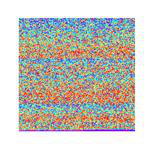

In [81]:
original_tensor=Images_test[1]
from torchvision import transforms
unloader = transforms.ToPILImage()
image = original_tensor.cpu().clone()  # clone the tensor
image = image.squeeze(0)  # remove the fake batch dimension
image = unloader(image)
image

In [66]:

training_data= torch.Tensor([Images_train,Labels_train])
test_data=[Images_test,Labels_test]

ValueError: only one element tensors can be converted to Python scalars

In [58]:
train_features=Images_train
train_labels=Labels_train

In [59]:


train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [60]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

TypeError: expected Tensor as element 1 in argument 0, but got numpy.int64